## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# 3. Data Preparation/ Cleaning

# Steps to Be Performed:

### Cleaning the Data:

1. Handle Missing Values: Identify and address missing data through imputation, estimation, or removal to maintain dataset integrity.

2. Remove Duplicate Entries: Eliminate redundant rows to ensure each data point is unique and reliable.
3. Ensure Consistent Formats: Convert data into uniform formats for seamless analysis (e.g., standardizing date or numeric representations).

### Integrating and Structuring the Data:

1. Standardize Text: Clean and harmonize textual data by converting to lowercase, trimming whitespace, removing special characters, and resolving inconsistencies.

2. Standardize Columns: Refine column structure by renaming for clarity, aligning data types for consistency, and reordering to enhance usability.

3. Select Key Features: Focus on the most relevant columns to streamline analysis and improve model performance.

4. Feature Engineering: Create new variables or transform existing ones to extract deeper insights and enrich the dataset.


### Merging datasets

1. tn and bom using title, left merge
2. imdb and tmdb using original_title, inner merge
3. rt and rt_review using id, inner merge
4. inspect unmatched rows after merging

In [1]:
# Importing the required Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.graph_objects as go

import zipfile

# Unzip the file
with zipfile.ZipFile("zippedData/im.db.zip", 'r') as zip_ref:
    zip_ref.extractall("zippedData")

## Dataset 1: Box Office Mojo (bom)

In [2]:
# Reading and loading the dataset
bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
bom = pd.DataFrame(bom)  # if 'bom' is a list of dictionaries or list of lists

In [4]:
bom.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [5]:
# check the colunms
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [6]:
#checking the datatypes of the columns 
bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [7]:
#concise summary statistics
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [8]:
#checking the dataset shape
bom.shape

(3387, 5)

In [9]:
#checking the dataset information
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
# Checking for Null values
bom.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [11]:
# Checking if there is duplicates
bom.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

## Dataset 2: The Numbers (tn)

In [12]:
# Reading and loading the dataset
tn = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [13]:
# remove commas and $ from the strings of numeric columns
tn['production_budget'] = tn['production_budget'].str.replace('$', '').str.replace(',', '')
tn['domestic_gross'] = tn['domestic_gross'].str.replace('$', '').str.replace(',', '')
tn['worldwide_gross'] = tn['worldwide_gross'].str.replace('$', '').str.replace(',', '')

In [14]:
# convert numeric columns to ints
tn['production_budget'] = tn['production_budget'].astype(float)
tn['domestic_gross'] = tn['domestic_gross'].astype(float)
tn['worldwide_gross'] = tn['worldwide_gross'].astype(float)

In [15]:
# create a column for the profit of every movie
tn['gross_profit'] = 0
tn['gross_profit'] = tn['worldwide_gross'] - tn['production_budget']

In [16]:
# access to the specific year a movie was made in
tn['movie_year'] = tn['release_date'].map(lambda x: x[-4:]).astype(int)

In [17]:
# Change to release_date to data time
tn['release_date'] = pd.to_datetime(tn['release_date'], errors='coerce')

# create release year and month from release_date
tn["release_year"] = tn["release_date"].dt.year
tn["release_month"] = tn["release_date"].dt.month

In [18]:
# create an ROI column
tn['roi'] = tn['gross_profit'] / tn['production_budget']

In [19]:
# Create a new binary column 'investment_outcome' to indicate whether the ROI is greater than or equal to 1.
tn['investment_outcome'] = 0

# If ROI >= 1, set the value to 1 (indicating profitable or break-even investment).
tn['investment_outcome'] = tn['roi'].map(lambda x: 1 if x >= 1 else 0)
# If ROI < 1, set the value to 0 (indicating a loss).

In [20]:
# Exclude movies with an ROI of -1, which are considered as complete losses
# and may not provide useful insights for analysis.
tn = tn.loc[tn['roi'] != -1]

In [21]:
# Create a new column 'quartile' and initialize all values to 0
# This step is to prepare for categorizing the movies into quartiles based on their production budget.
tn['quartile'] = 0

# Use pd.qcut to divide the 'production_budget' column into 4 equal quartiles
# The movies will be classified into four groups:
# "Bottom 25" for the lowest 25% of budgets,
# "25-50" for budgets in the second quartile,
# "50-75" for the third quartile,
# "Top 25" for the highest 25% of budgets.
tn["quartile"] = pd.qcut(tn["production_budget"], q=4, labels=["Bottom 25", "25-50", "50-75", "Top 25"])

# Now the 'quartile' column has labels corresponding to the production budget groups.

In [22]:
# Removing duplicate movie names 
tn = tn.drop_duplicates(subset=['movie'])

In [23]:
#checking the datatypes of the columns 
tn.dtypes

id                             int64
release_date          datetime64[ns]
movie                         object
production_budget            float64
domestic_gross               float64
worldwide_gross              float64
gross_profit                 float64
movie_year                     int32
release_year                   int32
release_month                  int32
roi                          float64
investment_outcome             int64
quartile                    category
dtype: object

In [24]:
#checking the dataset shape
tn.shape

(5339, 13)

In [25]:
#checking the dataset information
tn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5339 entries, 0 to 5781
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  5339 non-null   int64         
 1   release_date        5339 non-null   datetime64[ns]
 2   movie               5339 non-null   object        
 3   production_budget   5339 non-null   float64       
 4   domestic_gross      5339 non-null   float64       
 5   worldwide_gross     5339 non-null   float64       
 6   gross_profit        5339 non-null   float64       
 7   movie_year          5339 non-null   int32         
 8   release_year        5339 non-null   int32         
 9   release_month       5339 non-null   int32         
 10  roi                 5339 non-null   float64       
 11  investment_outcome  5339 non-null   int64         
 12  quartile            5339 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(5), int32(

In [26]:
# Checking for Null values
tn.isnull().sum()

id                    0
release_date          0
movie                 0
production_budget     0
domestic_gross        0
worldwide_gross       0
gross_profit          0
movie_year            0
release_year          0
release_month         0
roi                   0
investment_outcome    0
quartile              0
dtype: int64

## Dataset 3: Rotten Tomatoes Movies Info (rt_movie_info) Reviews (rt_reviews)

In [27]:
rt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [28]:
rt_movie_info = pd.DataFrame(rt_movie_info)

In [29]:
# Dropping unnecessary columns from movie info data
# Dropping unnecessary columns from movie info data (assuming rt is the DataFrame)
rt_movie = ['box_office', 'currency', 'dvd_date', 'studio']
rt_movie_info = rt_movie_info.drop(columns=rt_movie, errors='ignore')

In [30]:
# check the colunms
rt_movie_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'runtime'],
      dtype='object')

In [31]:
#checking the datatypes of the columns 
rt_movie_info.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
runtime         object
dtype: object

In [32]:
#checking the dataset shape
rt_movie_info.shape

(1560, 8)

In [33]:
#checking the dataset information
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   runtime       1530 non-null   object
dtypes: int64(1), object(7)
memory usage: 97.6+ KB


In [34]:
# Checking for Null values
rt_movie_info.isnull().sum()

id                0
synopsis         62
rating            3
genre             8
director        199
writer          449
theater_date    359
runtime          30
dtype: int64

## Dataset 4: Rotten Tomatoes Reviews (rt_reviews)

In [35]:
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', encoding='windows-1252')
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [36]:
rt_reviews = pd.DataFrame(rt_reviews)

In [37]:
# Dropping unnecessary column from movie reviews data
rt_reviews_info = ['rating']
rt_reviews = rt_reviews.drop(columns=rt_reviews_info, errors='ignore')

In [38]:
rt_reviews.columns

Index(['id', 'review', 'fresh', 'critic', 'top_critic', 'publisher', 'date'], dtype='object')

In [39]:
rt_reviews.shape

(54432, 7)

In [40]:
rt_reviews.isna().sum()

id               0
review        5563
fresh            0
critic        2722
top_critic       0
publisher      309
date             0
dtype: int64

### Dataset 5: TMDB Database

In [41]:
tmdb = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Dataset 6: IMDB Database

# im.db.zip (SQLite Database)

Description: Contains movie-related data from IMDB.

Relevant Tables:

movie_basics: Includes details like title, genres, runtime, and start year.

movie_ratings: Contains average ratings and vote counts for movies.

In [42]:
# Execute SQL query using pandas read_sql() and pass the connection
import sqlite3
import pandas as pd
conn = sqlite3.connect("zippedData/im.db")

In [43]:
query = "SELECT * FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [44]:
#Select relevant data for computation and set certain cleaning papmeters such as region = US, Death_year Is null and avgrating >=6
imdb = pd.read_sql("""
SELECT mb.movie_id, mb.genres, mr.averagerating AS avg_ratings, mr.numvotes AS num_votes, mk.region, 
pr.category, p.primary_name AS artist_name, mb.runtime_minutes AS screen_time, mb.primary_title AS movie_title, p.death_year
FROM movie_basics mb
JOIN movie_akas mk ON mk.movie_id = mb.movie_id
JOIN movie_ratings mr ON mr.movie_id = mb.movie_id
JOIN principals pr ON pr.movie_id = mb.movie_id
JOIN persons p ON p.person_id = pr.person_id
WHERE mk.region != 'None'
AND p.death_year IS NULL
;""", conn)
#More cleaning using pandas, dropped duplicates, set the defining catagories and dropped missing/empty values from Genre
imdb = imdb.drop_duplicates(subset=['movie_id'])
# Removing duplicate movie names
imdb = imdb.drop_duplicates(subset=['movie_title'])
imdb = imdb.dropna(subset=['genres'])
categories_of_interest = ['actor', 'actress', 'writer', 'director', 'producer']
imdb = imdb[imdb['category'].isin(categories_of_interest)]
#Created a weighted average for rating
imdb['weighted_avg'] = (imdb['avg_ratings'] * imdb['num_votes']) / imdb['num_votes'].sum()
imdb

,movie_id,genres,avg_ratings,num_votes,region,category,artist_name,screen_time,movie_title,death_year,weighted_avg
0,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,1.666936e-02
423,tt0381957,Drama,7.6,23,GB,actor,Derek Jacobi,92.0,Cloud Cuckoo Land,None,7.717939e-07
433,tt0401729,"Action,Adventure,Sci-Fi",6.6,241792,UA,actor,Willem Dafoe,132.0,John Carter,None,7.046051e-03
750,tt10084780,"Drama,Romance",8.3,30,IN,director,Sateesh Chandra Nadella,NaN,Vinara sodara veera kumara,None,1.099409e-06
760,tt1014759,"Adventure,Family,Fantasy",6.5,358813,IE,actor,Johnny Depp,108.0,Alice in Wonderland,None,1.029773e-02
...,...,...,...,...,...,...,...,...,...,...,...
1992082,tt9593792,Horror,6.1,39,TH,director,Mate Yimsomboon,NaN,Ghost Wife,None,1.050399e-06
1992100,tt9644084,Documentary,5.2,5,DE,director,Uli M. Schüppel,95.0,Der Atem,None,1.147977e-07
1992120,tt9657946,Drama,6.0,16,XWW,actor,Marcelo Di Souza,90.0,Homing,None,4.238685e-07
1992144,tt9726638,"Action,Adventure,Comedy",6.0,6,CN,actress,Carman Lee,90.0,Monkey King: The Volcano,None,1.589507e-07


In [45]:
pd.read_sql("""
    SELECT 
        w.*, 
        p.primary_name, 
        ma.title,
        mb.genres,
        ma.language,
        mr.averagerating,
        mr.numvotes
    FROM writers w
    JOIN persons p ON w.person_id = p.person_id
    JOIN movie_basics mb  ON w.movie_id = mb.movie_id
    JOIN movie_akas ma ON w.movie_id = ma.movie_id
    JOIN movie_ratings mr ON w.movie_id = mr.movie_id
    JOIN principals pr USING(movie_id)
    WHERE p.death_year IS NULL
    AND p.primary_profession = 'writer'
    AND (mb.genres LIKE '%Horror%' OR mb.genres LIKE '%Thriller%' OR mb.genres LIKE'%Mystery%')
    AND mr.averagerating >= 7.5
    AND mr.numvotes > 9665
    GROUP BY primary_name
    ORDER BY mr.averagerating DESC
""", conn)

,movie_id,person_id,primary_name,title,genres,language,averagerating,numvotes
0,tt5354160,nm7861818,Adnan Adib Khan,Aynabaji,"Crime,Mystery,Thriller",None,9.3,18470
1,tt8108198,nm4914249,Arijit Biswas,Andhadhun,"Crime,Thriller",None,8.5,43409
2,tt4987556,nm5394336,A.N. Balakrishnan,Double Attack 2,"Action,Crime,Thriller",hi,8.5,13747
3,tt8239946,nm10304029,Narayan Dharap,Tumbbad,"Drama,Fantasy,Horror",None,8.3,14128
4,tt2375559,nm6253319,Hari Prasad Jakka,1 - Nenokkadine,"Action,Mystery,Thriller",None,8.3,41124
5,tt3461252,nm6211716,Ahmed Mourad,Al Feel Al Azrak,"Drama,Horror,Mystery",ar,8.2,21776
6,tt4016934,nm1941029,Seo-kyeong Jeong,A Criada,"Drama,Romance,Thriller",None,8.1,79272
7,tt4016934,nm1258797,Sarah Waters,A Criada,"Drama,Romance,Thriller",None,8.1,79272
8,tt1821480,nm4449370,Nikhil Vyas,A sztori,"Mystery,Thriller",None,8.1,51830
9,tt1821480,nm4298729,Advaita Kala,A sztori,"Mystery,Thriller",None,8.1,51830


In [46]:
pd.read_sql("""
SELECT *
FROM movie_basics mb
JOIN directors dr USING(movie_id)
JOIN principals pr USING(movie_id)
JOIN persons p USING(person_id)
JOIN movie_ratings mr USING(movie_id)
WHERE death_year IS NULL
AND
(
primary_title LIKE '%Gallows%' 
OR primary_title LIKE '%Devil Inside%' 
OR primary_title = '%Insidious%' 
OR primary_title = '%Unfriended%' 
OR primary_title LIKE '%Paranormal Activity%' 
OR primary_title = '%Split%' 
OR primary_title = '%Chernobyl Diaries%' 
OR primary_title = '%Annabelle%'
)
AND 
category = 'director'
GROUP BY primary_name
;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,averagerating,numvotes
0,tt3108988,Paranormal Activity Security Squad,Paranormal Activity Security Squad,2016,NaN,"Comedy,Horror",nm2066764,5,nm2066764,director,None,None,Alexander Wraith,1979.0,None,"actor,writer,producer",5.4,13
1,tt2109184,Paranormal Activity 4,Paranormal Activity 4,2012,88.0,"Horror,Mystery,Thriller",nm1413364,5,nm1160962,director,None,None,Ariel Schulman,NaN,None,"writer,producer,director",4.6,58408
2,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",nm3951039,5,nm4000389,director,None,None,Chris Lofing,NaN,None,"producer,director,writer",4.2,17763
3,tt2473682,Paranormal Activity: The Marked Ones,Paranormal Activity: The Marked Ones,2014,84.0,"Horror,Mystery,Thriller",nm0484907,5,nm0484907,director,None,None,Christopher Landon,1975.0,None,"writer,producer,director",5.0,37147
4,tt2417650,30 Nights of Paranormal Activity with the Devi...,30 Nights of Paranormal Activity with the Devi...,2013,80.0,Comedy,nm0608936,5,nm0608936,director,None,None,Craig Moss,NaN,None,"director,writer,producer",2.6,3381
5,tt2473510,Paranormal Activity: The Ghost Dimension,Paranormal Activity: The Ghost Dimension,2015,88.0,"Horror,Mystery,Thriller",nm0687427,5,nm0687427,director,None,None,Gregory Plotkin,NaN,None,"editorial_department,editor,producer",4.6,22361
6,tt2109184,Paranormal Activity 4,Paranormal Activity 4,2012,88.0,"Horror,Mystery,Thriller",nm1160962,5,nm1160962,director,None,None,Henry Joost,NaN,None,"writer,producer,director",4.6,58408
7,tt1990211,The Devil Inside Me,Duo ming xin tiao,2011,90.0,"Horror,Thriller",nm3814942,5,nm3814942,director,None,None,Qi Zhang,NaN,None,"writer,director,actor",5.6,59
8,tt1649749,Demon Exorcism: The Devil Inside Maxwell Bastas,Demon Equation,2013,NaN,Horror,nm3157118,5,nm3157118,director,None,None,Richard G. James,NaN,None,"director,writer,editor",5.5,35
9,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror,nm0931095,5,nm0931095,director,None,None,Tod Williams,1968.0,None,"director,writer,producer",5.7,93122


In [47]:
pd.read_sql("""
SELECT *
FROM movie_basics mb
JOIN directors dr USING(movie_id)
JOIN principals pr USING(movie_id)
JOIN persons p USING(person_id)
JOIN movie_ratings mr USING(movie_id)
WHERE death_year IS NULL
AND (
    primary_title LIKE '%Gallows%' 
    OR primary_title LIKE '%Devil Inside%' 
    OR primary_title LIKE '%Insidious%' 
    OR primary_title LIKE '%Unfriended%' 
    OR primary_title LIKE '%Paranormal Activity%' 
    OR primary_title LIKE '%Split%' 
    OR primary_title LIKE '%Chernobyl Diaries%' 
    OR primary_title LIKE '%Annabelle%'
)
AND mr.averagerating >= 7.5
AND category IN ('actor', 'actress')
GROUP BY primary_name;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,averagerating,numvotes
0,tt1537385,Annabelle & Bear,Annabelle & Bear,2010,100.0,Drama,nm3672532,1,nm0557478,actor,None,"[""Bear""]",Amy S. Weber,NaN,None,"producer,director,writer",8.0,53
1,tt3168478,Split Gas,Split Gas,2014,71.0,"Comedy,Drama",nm4839546,1,nm4587628,actress,None,"[""Otey""]",Jacques Edeline,NaN,None,"writer,actor,sound_department",8.3,7
2,tt8451712,Babysplitters,Babysplitters,2019,119.0,Comedy,nm1153627,1,nm0275417,actor,None,"[""Dr. Cooper, MFT""]",Sam Friedlander,1978.0,None,"producer,production_manager,director",9.3,77
3,tt2467370,Split Second,Split Second,2012,83.0,Drama,nm5394959,1,nm4244738,actor,None,"[""Mike Yancey""]",Timothy Fontaine,NaN,None,"cinematographer,editor,director",8.1,11


In [48]:
imdb.columns

Index(['movie_id', 'genres', 'avg_ratings', 'num_votes', 'region', 'category',
       'artist_name', 'screen_time', 'movie_title', 'death_year',
       'weighted_avg'],
      dtype='object')

### Merge The Numbers(tn) with imdb Database

In [49]:
# merge movie_basics and budget on movie and movie_title
merged_tn_imdb = pd.merge(imdb, tn, left_on="movie_title", right_on="movie", how="inner")

1. Separated and analyzed the 'Genre' column. 
2. Selecting the first listed genre as the primary genre for further analysis. 
3. Identified the top 5 genres that appeared most frequently with the highest ratings.

In [50]:
# Using str.split() and str.get() to extract the first genre
merged_tn_imdb['main_genre'] = merged_tn_imdb['genres'].str.split(',').str.get(0)
merged_tn_imdb

,movie_id,genres,avg_ratings,num_votes,region,category,artist_name,screen_time,movie_title,death_year,...,domestic_gross,worldwide_gross,gross_profit,movie_year,release_year,release_month,roi,investment_outcome,quartile,main_genre
0,tt0369610,"Action,Adventure,Sci-Fi",7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,...,652270625.0,1.648855e+09,1.433855e+09,2015,2015,6,6.669092,1,Top 25,Action
1,tt0401729,"Action,Adventure,Sci-Fi",6.6,241792,UA,actor,Willem Dafoe,132.0,John Carter,None,...,73058679.0,2.827781e+08,7.778100e+06,2012,2012,3,0.028284,0,Top 25,Action
2,tt1014759,"Adventure,Family,Fantasy",6.5,358813,IE,actor,Johnny Depp,108.0,Alice in Wonderland,None,...,334191110.0,1.025491e+09,8.254911e+08,2010,2010,3,4.127456,1,Top 25,Adventure
3,tt1194173,"Action,Adventure,Thriller",6.7,268678,RS,actor,Scott Glenn,135.0,The Bourne Legacy,None,...,113203870.0,2.803559e+08,1.553559e+08,2012,2012,8,1.242847,1,Top 25,Action
4,tt1219289,"Mystery,Sci-Fi,Thriller",7.4,492490,AR,actor,Robert De Niro,105.0,Limitless,None,...,79249455.0,1.555649e+08,1.285649e+08,2011,2011,3,4.761664,1,50-75,Mystery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,tt3829266,"Action,Adventure,Sci-Fi",5.4,94888,LT,director,Shane Black,107.0,The Predator,None,...,51024708.0,1.594876e+08,7.148756e+07,2018,2018,9,0.812359,0,Top 25,Action
1714,tt4651520,Comedy,6.2,100952,UA,actress,Christina Applegate,100.0,Bad Moms,None,...,113257297.0,1.809987e+08,1.609987e+08,2016,2016,7,8.049936,1,50-75,Comedy
1715,tt5462602,"Comedy,Drama,Romance",7.6,104008,NO,actress,Holly Hunter,120.0,The Big Sick,None,...,42872467.0,5.397286e+07,4.897286e+07,2017,2017,6,9.794572,1,Bottom 25,Comedy
1716,tt5649108,"Comedy,Crime,Drama",6.7,25098,FR,producer,Nat Faxon,92.0,Thoroughbreds,None,...,3072605.0,3.187302e+06,-1.812698e+06,2018,2018,3,-0.362540,0,Bottom 25,Comedy


In [51]:
# Split genres and expand them into separate rows using apply and pd.Series
merged_tn_imdb_exp = merged_tn_imdb['genres'].apply(lambda x: pd.Series(x.split(','))).stack().reset_index(level=1, drop=True)
merged_tn_imdb_exp.name = 'genres'
merged_tn_imdb = merged_tn_imdb.drop('genres', axis=1).join(merged_tn_imdb_exp)
merged_tn_imdb

,movie_id,avg_ratings,num_votes,region,category,artist_name,screen_time,movie_title,death_year,weighted_avg,...,worldwide_gross,gross_profit,movie_year,release_year,release_month,roi,investment_outcome,quartile,main_genre,genres
0,tt0369610,7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,0.016669,...,1.648855e+09,1.433855e+09,2015,2015,6,6.669092,1,Top 25,Action,Action
0,tt0369610,7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,0.016669,...,1.648855e+09,1.433855e+09,2015,2015,6,6.669092,1,Top 25,Action,Adventure
0,tt0369610,7.0,539338,BG,producer,Patrick Crowley,124.0,Jurassic World,None,0.016669,...,1.648855e+09,1.433855e+09,2015,2015,6,6.669092,1,Top 25,Action,Sci-Fi
1,tt0401729,6.6,241792,UA,actor,Willem Dafoe,132.0,John Carter,None,0.007046,...,2.827781e+08,7.778100e+06,2012,2012,3,0.028284,0,Top 25,Action,Action
1,tt0401729,6.6,241792,UA,actor,Willem Dafoe,132.0,John Carter,None,0.007046,...,2.827781e+08,7.778100e+06,2012,2012,3,0.028284,0,Top 25,Action,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,tt5649108,6.7,25098,FR,producer,Nat Faxon,92.0,Thoroughbreds,None,0.000742,...,3.187302e+06,-1.812698e+06,2018,2018,3,-0.362540,0,Bottom 25,Comedy,Crime
1716,tt5649108,6.7,25098,FR,producer,Nat Faxon,92.0,Thoroughbreds,None,0.000742,...,3.187302e+06,-1.812698e+06,2018,2018,3,-0.362540,0,Bottom 25,Comedy,Drama
1717,tt6139732,7.4,57549,SI,actor,Will Smith,128.0,Aladdin,None,0.001880,...,6.192343e+08,4.372343e+08,2019,2019,5,2.402386,1,Top 25,Adventure,Adventure
1717,tt6139732,7.4,57549,SI,actor,Will Smith,128.0,Aladdin,None,0.001880,...,6.192343e+08,4.372343e+08,2019,2019,5,2.402386,1,Top 25,Adventure,Comedy


# EDA/ Data Visualization

### Release month vs genres ( in terms of ROI)

In [52]:
roi_genre_month = merged_tn_imdb.groupby(['genres', 'release_month'])['roi'].mean()
roi_genre_month

genres   release_month
Action   1                2.376693
         2                1.750647
         3                1.248212
         4                2.416315
         5                2.046155
                            ...   
Western  7               -0.054538
         9               -0.084105
         10              -0.729487
         11              -0.486402
         12               2.970039
Name: roi, Length: 239, dtype: float64

### ROI per genre

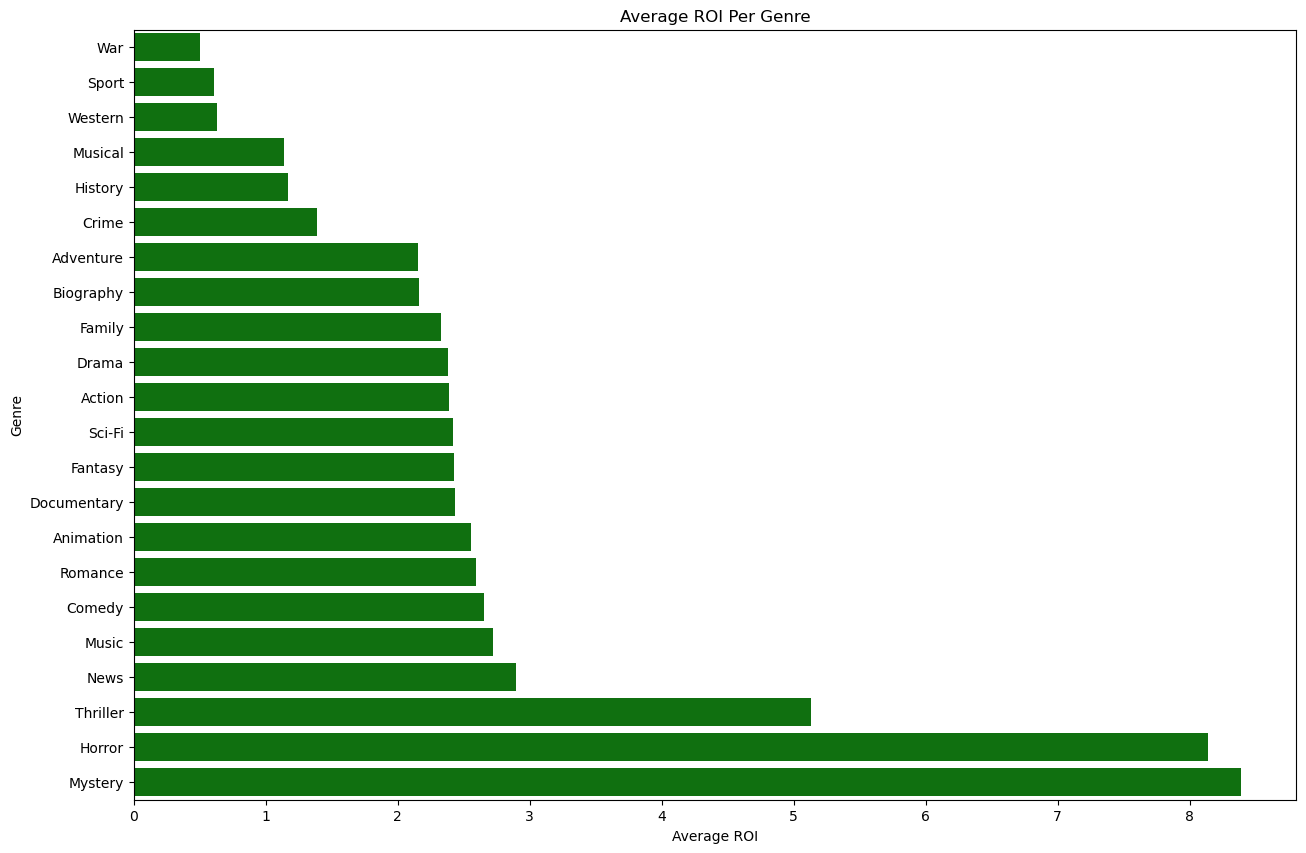

In [53]:
# Calculate average ROI per genre
average_roi_per_genre = merged_tn_imdb.groupby('genres')['roi'].mean().sort_values(ascending=True).reset_index()

# Plot using seaborn for a cleaner presentation
plt.figure(figsize=(15, 10))
sns.barplot(x='roi', y='genres', data=average_roi_per_genre, color='green')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.title('Average ROI Per Genre')
plt.show()

### Top 10 genres based on ROI

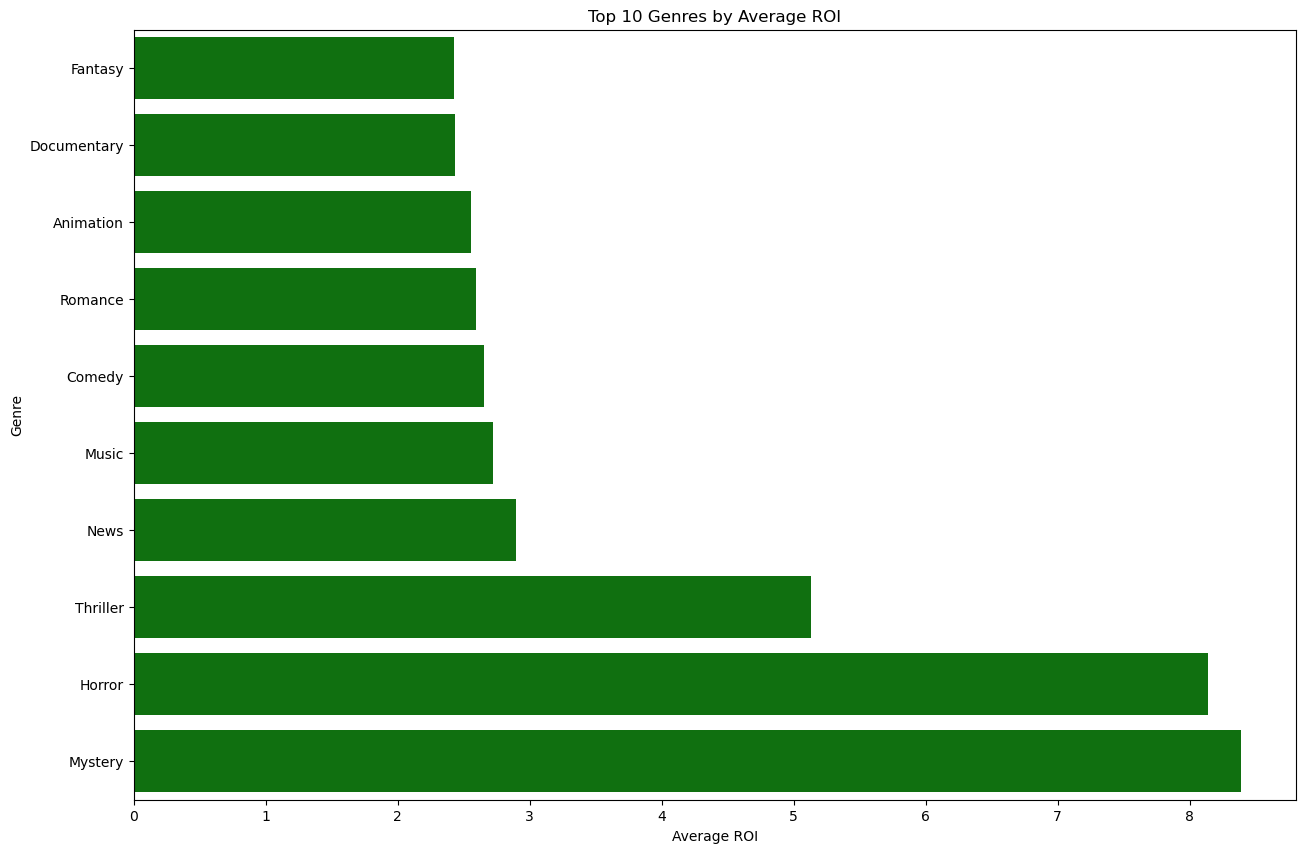

In [54]:
# Calculate top 10 genres by average ROI
top_10_genres_roi = average_roi_per_genre.sort_values(by='roi', ascending=False).head(10)

# Plot using seaborn for cleaner aesthetics
plt.figure(figsize=(15, 10))
sns.barplot(x='roi', y='genres', data=top_10_genres_roi, color='green')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average ROI')
plt.gca().invert_yaxis()
plt.show()

### Top 10 genres based on ROI and Budget

In [55]:
# Calculate the average ROI and production budget per genre
average_roi_and_budget_per_genre = merged_tn_imdb.groupby('genres').agg({
    'roi': 'mean',
    'production_budget': 'mean'
}).reset_index()

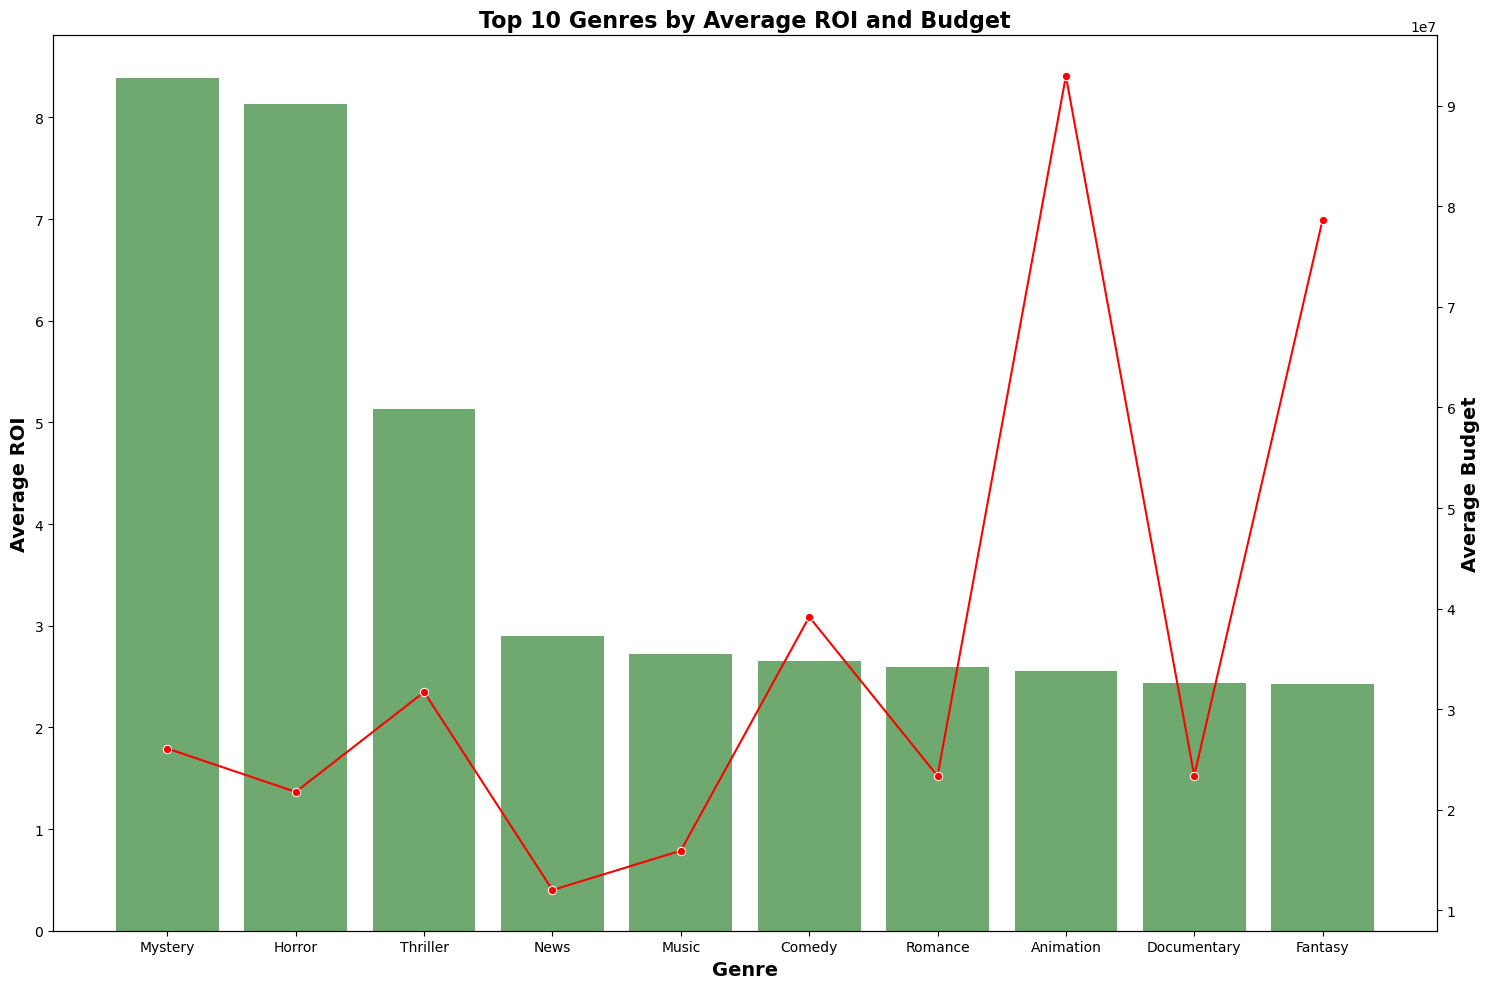

In [56]:
# Sort by 'roi' and select the top 10 genres
top_10_genres = average_roi_and_budget_per_genre.sort_values(by='roi', ascending=False).head(10)

# Plot using Seaborn for dual axis (line and bar plots)
fig, ax1 = plt.subplots(figsize=(15, 10))

# Barplot for ROI
sns.barplot(data=top_10_genres, x='genres', y='roi', ax=ax1, color='green', alpha=0.6)
ax1.set_xlabel('Genre', color='black', fontsize=14, fontweight='bold')
ax1.set_ylabel('Average ROI', color='black', fontsize=14, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='black')

# Create second y-axis
ax2 = ax1.twinx()

# Lineplot for Budget
sns.lineplot(data=top_10_genres, x='genres', y='production_budget', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Budget', color='black', fontsize=14, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='black')

# Title and Show
plt.title('Top 10 Genres by Average ROI and Budget', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

In [57]:
expanded_data = []
for _, row in merged_tn_imdb.iterrows():
    genres = row['genres'].split(',')
    for genre in genres:
        new_row = row.copy()
        new_row['genres'] = genre.strip()
        expanded_data.append(new_row)

merged_tn_imdb = pd.DataFrame(expanded_data)


In [58]:
# Filter the dataset to find directors who:
# - Are listed as the 'director' in the category column
# - Have directed movies in the genres Horror, Thriller, or Mystery
# - Have an average movie rating (avg_ratings) of 7 or higher
# - Have a significant number of audience votes (num_votes >= 9000)
directors = merged_tn_imdb[(merged_tn_imdb['category'] == 'director') & 
                           (merged_tn_imdb['genres'].str.contains('Horror|Thriller|Mystery')) &
                           (merged_tn_imdb['avg_ratings'] >= 7) &
                           (merged_tn_imdb['num_votes'] >= 9000)]

# Sort the filtered directors by average ratings in descending order
directors = directors.sort_values(by='avg_ratings', ascending=False)

# Get the top 5 unique directors
top_5_directors = directors['artist_name'].drop_duplicates().head(5)

# Print the names of the top 5 directors
print("Top 5 Directors:")
for director in top_5_directors:
    print(director)

Top 5 Directors:
David Fincher
John Madden
Kathryn Bigelow
Derek Cianfrance
Oliver Stone


### Bar Chart of Top Directors by Average Ratings

The bar chart highlights the top directors with the highest average ratings.

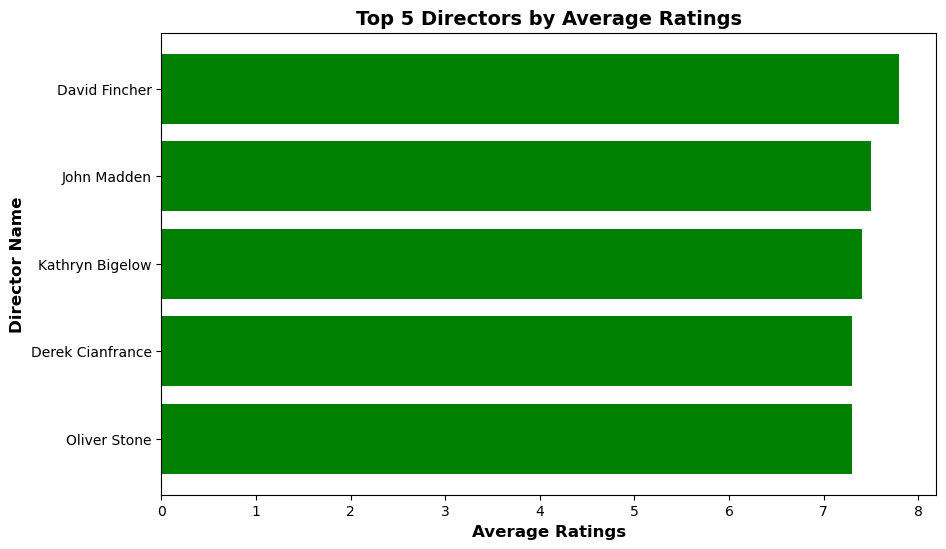

In [59]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(directors['artist_name'], directors['avg_ratings'], color='green')
plt.xlabel('Average Ratings', fontsize=12, fontweight='bold')
plt.ylabel('Director Name', fontsize=12, fontweight='bold')
plt.title('Top 5 Directors by Average Ratings', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.show()

The bar chart highlights that Director David Fincher consistently achieves the highest average ratings among directors who specialize in the genres of Horror, Thriller, or Mystery. This suggests his exceptional skill in crafting compelling narratives within these genres, making him a standout among his peers.

### Scatter Plot of Directors: Ratings vs. Number of Votes

Show the relationship between the number of votes a director's movies receive and their average ratings.

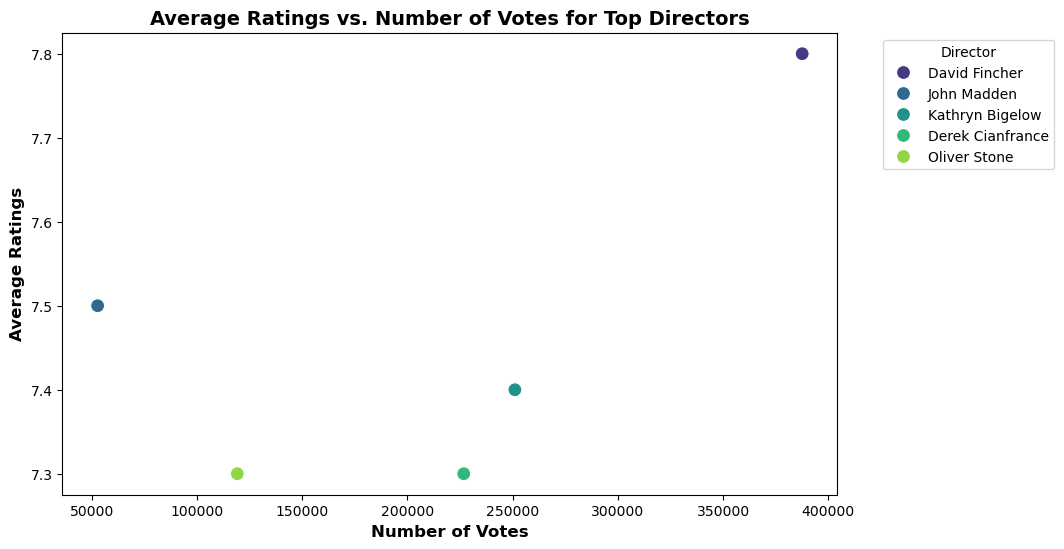

In [60]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=directors, x='num_votes', y='avg_ratings', hue='artist_name', s=100, palette='viridis')
plt.xlabel('Number of Votes', fontsize=12, fontweight='bold')
plt.ylabel('Average Ratings', fontsize=12, fontweight='bold')
plt.title('Average Ratings vs. Number of Votes for Top Directors', fontsize=14, fontweight='bold')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

David Fincher's movies stand out as they not only have consistently high ratings (above 7) but also receive a significant number of votes, indicating widespread recognition and appreciation from audiences.

The scatter plot emphasizes his exceptional performance compared to other directors by visually highlighting his movies as a cluster or outliers with high ratings and votes.

The pattern observed in the plot suggests that Fincher's works appeal to both critics (high ratings) and a large audience base (high votes), underlining his unique position as a director whose films are both critically acclaimed and commercially successful.

### Genre Distribution of Selected Directors

Provides insights into which genres are most prevalent among these high-rated directors.

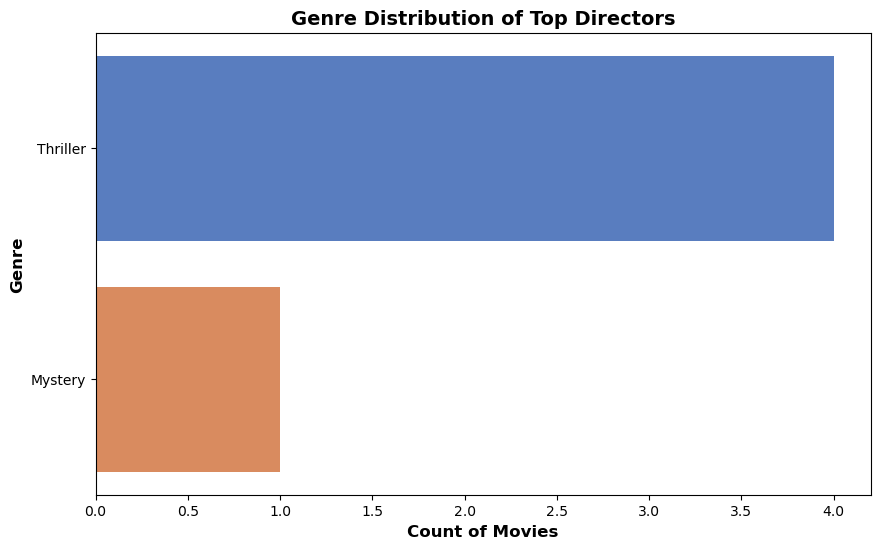

In [61]:
genre_counts = directors['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_counts, x='Count', y='Genre', palette='muted')
plt.xlabel('Count of Movies', fontsize=12, fontweight='bold')
plt.ylabel('Genre', fontsize=12, fontweight='bold')
plt.title('Genre Distribution of Top Directors', fontsize=14, fontweight='bold')
plt.show()


Thriller and Mystery genres dominate the chart, indicating that the majority of the high-rated movies directed by these top directors fall into these categories. This suggests that these genres are particularly popular or well-executed by the directors in question.

Audience Preference: The prominence of Thriller and Mystery genres could reflect audience preferences, as these genres often involve engaging and suspenseful storytelling, which tends to resonate well with viewers.

Critical Acclaim: Movies within the Thriller and Mystery genres are often crafted with intricate plots and compelling narratives, which may lead to higher ratings, further boosting their representation in this dataset.

Genre Mastery by Directors: The leading directors might have a specialization or particular strength in crafting Thriller and Mystery films, contributing to their dominance in these genres.

### Bubble Chart: Ratings vs. Votes with Genre as a Dimension

 Combines multiple dimensions to analyze the influence of genres on ratings and popularity.

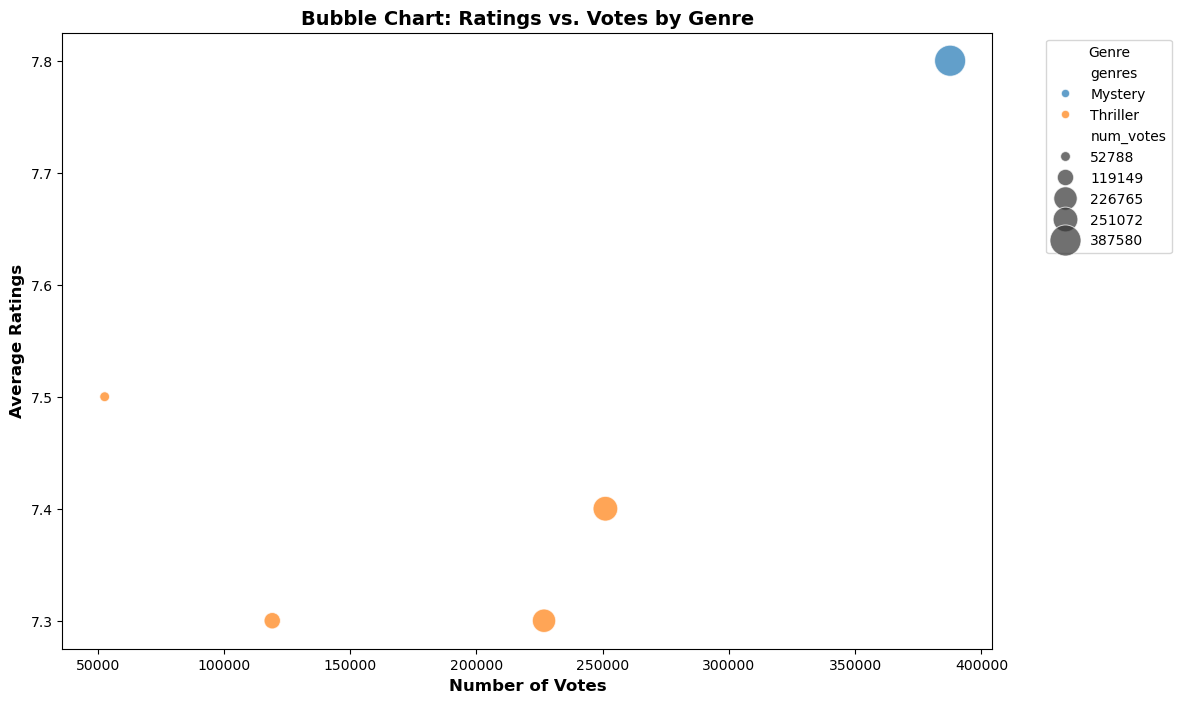

In [62]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=directors, x='num_votes', y='avg_ratings', size='num_votes', hue='genres', alpha=0.7, sizes=(50, 500)
)
plt.xlabel('Number of Votes', fontsize=12, fontweight='bold')
plt.ylabel('Average Ratings', fontsize=12, fontweight='bold')
plt.title('Bubble Chart: Ratings vs. Votes by Genre', fontsize=14, fontweight='bold')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Mystery Genre Leading in Ratings and Votes:
The Mystery genre stands out, with many films from this category appearing in the top-right quadrant of the plot. This quadrant indicates movies with high average ratings and a large number of votes, suggesting that Mystery films are not only popular but also critically acclaimed.

Director Strength in Mystery Genre:
The directors associated with the Mystery genre are achieving strong ratings and a large volume of votes, possibly due to their ability to captivate audiences with complex and engaging plots. These movies seem to have a broad appeal, encouraging high levels of viewer participation and feedback (as indicated by the number of votes).

Hues Representing Genres:
The color-coded hues (Mystery) dominate the scatter plot, visually emphasizing its prominence in both ratings and votes. This highlights that Mystery films tend to attract both a large audience and positive reviews, making them a standout genre for the directors in this dataset.

Genre Popularity:
The Mystery genre's significant presence in both axes indicates that it is a strong performer among high-rated films, potentially due to the suspenseful and thought-provoking nature of the genre, which keeps audiences engaged and coming back for more.

In [63]:
Actors_Actress = merged_tn_imdb[(merged_tn_imdb['category'].isin(['actor','actress']))& 
                           (merged_tn_imdb['genres'].str.contains('Horror|Thriller|Mystery'))&
                           (merged_tn_imdb['avg_ratings'] >= 7.5) &
                           (merged_tn_imdb['num_votes'] >= 9000)]

# Get the unique names from the 'artist_name' column
Actors_Actress = Actors_Actress['artist_name'].unique()


print("Actors and Actress:")
for name in Actors_Actress:
    print(name)

Actors and Actress:
Leonardo DiCaprio
Natalie Portman
Ben Affleck
John C. Reilly
Tom Hanks
Gary Oldman
Rene Russo
Javier Bardem
Lubna Azabal
Matthew Goode
Lili Taylor
Forest Whitaker
Samuel L. Jackson
Sandra Bullock
Ewan McGregor
Harrison Ford
Sean Bridgers
Catherine Keener


### Bar Chart of Number of Movies per Actor/Actress:

This visualization can help you see which actors and actresses have appeared in the highest number of movies within the specified genres (Horror, Thriller, and Mystery) with high ratings and votes.

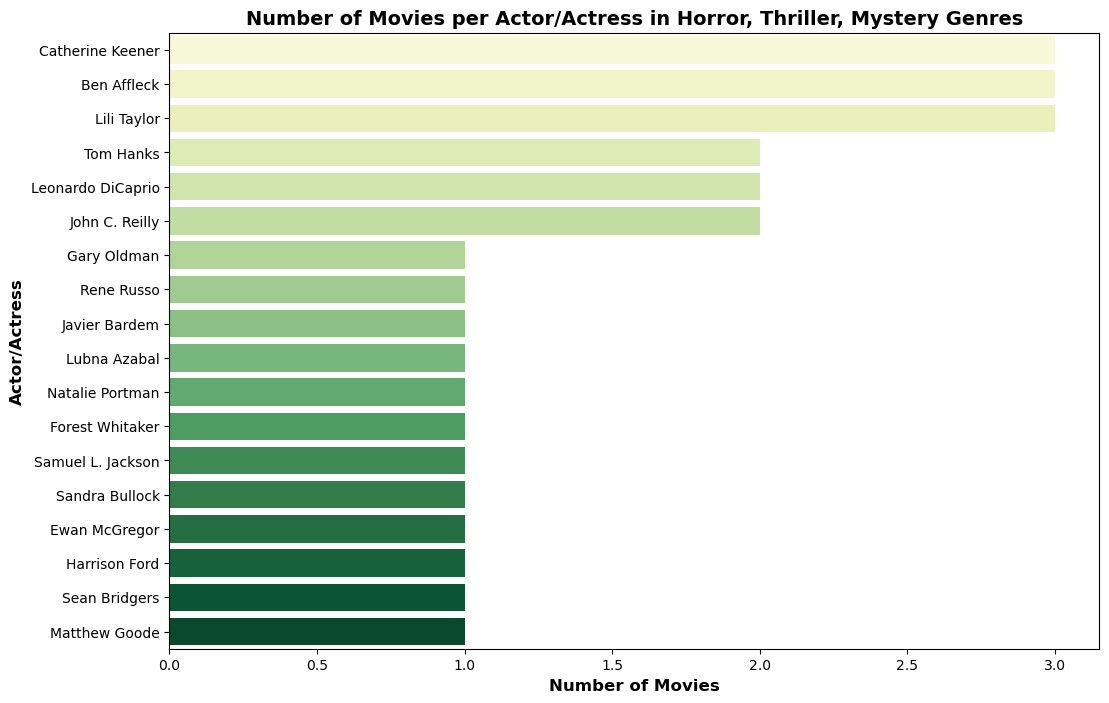

In [64]:
# Count the occurrences of each actor/actress in the filtered dataset
actor_counts = merged_tn_imdb[(merged_tn_imdb['category'].isin(['actor', 'actress'])) & 
                              (merged_tn_imdb['genres'].str.contains('Horror|Thriller|Mystery')) & 
                              (merged_tn_imdb['avg_ratings'] >= 7.5) & 
                              (merged_tn_imdb['num_votes'] >= 9000)]

actor_counts = actor_counts['artist_name'].value_counts().reset_index()
actor_counts.columns = ['Actor/Actress', 'Movie Count']

# Plot a bar chart where the x-axis represents actors/actresses and the y-axis represents the number of movies
plt.figure(figsize=(12, 8))
sns.barplot(data=actor_counts, x='Movie Count', y='Actor/Actress', palette='YlGn')
plt.xlabel('Number of Movies', fontsize=12, fontweight='bold')
plt.ylabel('Actor/Actress', fontsize=12, fontweight='bold')
plt.title('Number of Movies per Actor/Actress in Horror, Thriller, Mystery Genres', fontsize=14, fontweight='bold')
plt.show()

In the plot, Catherine Keener, Lili Taylor, Ben Affleck, John C. Reilly, Tom Hanks, Harrison Ford, and Ewan McGregor are shown as the leading actors and actresses in Horror, Thriller, and Mystery genres with ratings above 7.5 and substantial audience engagement (over 9000 votes). This suggests that these actors/actresses have consistently appeared in top-rated films within these genres, making significant contributions to their success. Their repeated appearances across these genres demonstrate their strong on-screen presence, versatility, and appeal to both critics and large audiences.

### Scatter Plot of Actor/Actress Performance (Ratings vs. Number of Votes)

This visualization can help explore the relationship between average ratings and number of votes for each actor or actress in the specified genres. It will show how popular and highly-rated the movies are that feature these actors/actresses.

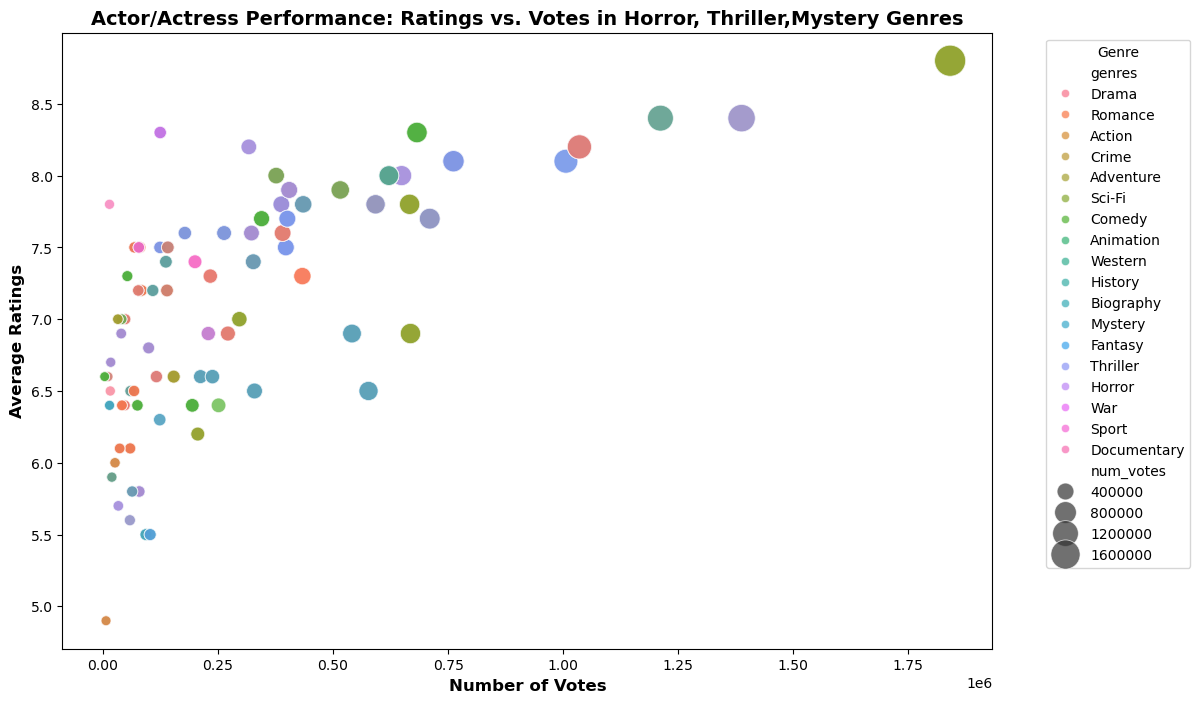

In [65]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_tn_imdb[(merged_tn_imdb['artist_name'].isin(Actors_Actress))], 
                x='num_votes', y='avg_ratings', hue='genres', size='num_votes', alpha=0.7, sizes=(50, 500))
plt.xlabel('Number of Votes', fontsize=12, fontweight='bold')
plt.ylabel('Average Ratings', fontsize=12, fontweight='bold')
plt.title('Actor/Actress Performance: Ratings vs. Votes in Horror, Thriller,Mystery Genres',
          fontsize=14, fontweight='bold')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Sci-Fi: This genre often attracts large, dedicated audiences due to its imaginative nature and expansive storytelling possibilities. Sci-Fi films, especially those with a high rating and substantial audience engagement (votes), indicate that viewers appreciate the world-building, visual effects, and sometimes the thought-provoking themes Sci-Fi offers.

Comedy: Comedy remains a consistent favorite among moviegoers. A high number of movies in this genre with ratings over 7.5 suggest that these films tend to perform well, with a broad appeal that ensures steady viewership and favorable reviews. Comedy’s universal appeal is a likely factor in its prevalence among top-rated films.

Thriller: Thriller films consistently draw large audiences due to their suspenseful and engaging narratives. Thrillers often feature gripping plots, which can generate strong word-of-mouth and repeat viewing, leading to high ratings and significant votes.

In [66]:
Writers = merged_tn_imdb[(merged_tn_imdb['category'].isin(['writer'])) & 
                           (merged_tn_imdb['genres'].str.contains('Horror|Thriller'))&
                           (merged_tn_imdb['avg_ratings'] >= 6.5)]

# Get the unique names from the 'artist_name' column
Writers = Writers.sort_values(by='avg_ratings', ascending=False)['artist_name'].unique()

# Print the director names
print("Best Writers:")
for name in Writers:
    print(name)

Best Writers:
Stephen King
Dario Argento
Phil Hay
John Carpenter
Colin Bateman
Sam Raimi


### Bar Chart (Top Writers by Average Ratings)

This chart would show the best writers sorted by their average ratings, allowing you to easily visualize which writers have the highest average ratings in the Horror and Thriller genres.

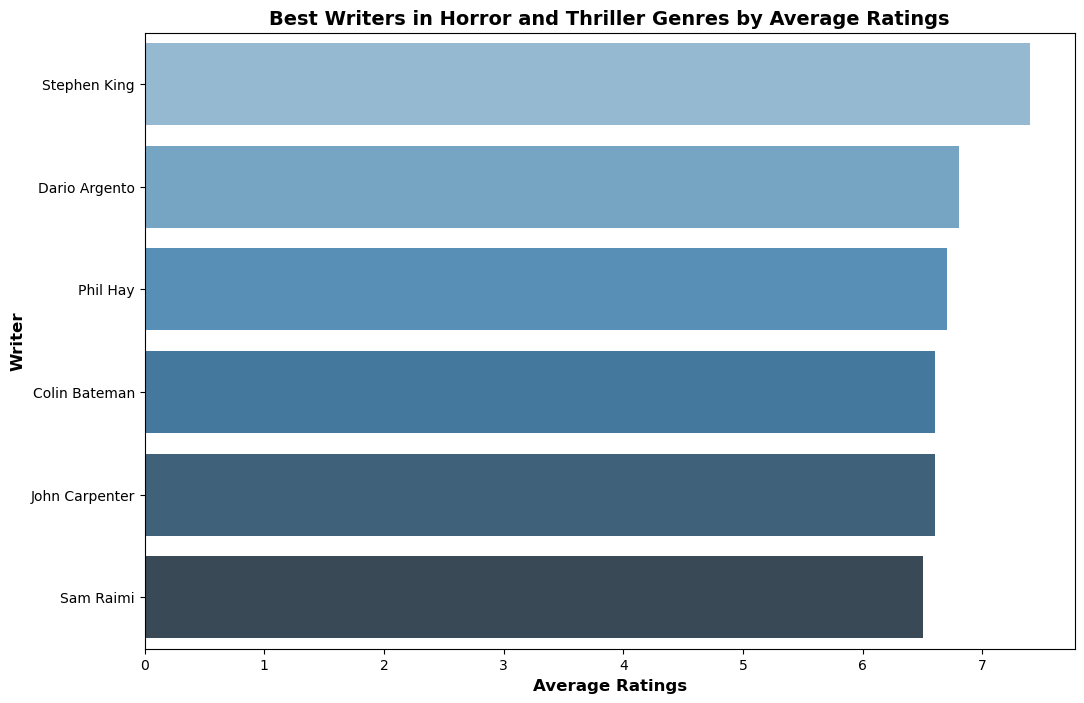

In [67]:
# Count the occurrences of each writer in the filtered dataset
writer_counts = Writers = merged_tn_imdb[(merged_tn_imdb['category'] == 'writer') & 
                                           (merged_tn_imdb['genres'].str.contains('Horror|Thriller')) &
                                           (merged_tn_imdb['avg_ratings'] >= 6.5)]

writer_counts = writer_counts.groupby('artist_name').agg({'avg_ratings': 'mean', 'genres': 'count'}).reset_index()
writer_counts = writer_counts.sort_values(by='avg_ratings', ascending=False)

# Plot a bar chart where x-axis represents writers and y-axis represents average ratings
plt.figure(figsize=(12, 8))
sns.barplot(data=writer_counts, x='avg_ratings', y='artist_name', palette='Blues_d')
plt.xlabel('Average Ratings', fontsize=12, fontweight='bold')
plt.ylabel('Writer', fontsize=12, fontweight='bold')
plt.title('Best Writers in Horror and Thriller Genres by Average Ratings', fontsize=14, fontweight='bold')
plt.show()

 ### Word Cloud (Most Frequent Writers)

The word cloud visualization will allow you to quickly spot the most frequently occurring writers, and it’s a great way to highlight trends visually. Writers who have contributed more will be shown in larger fonts.

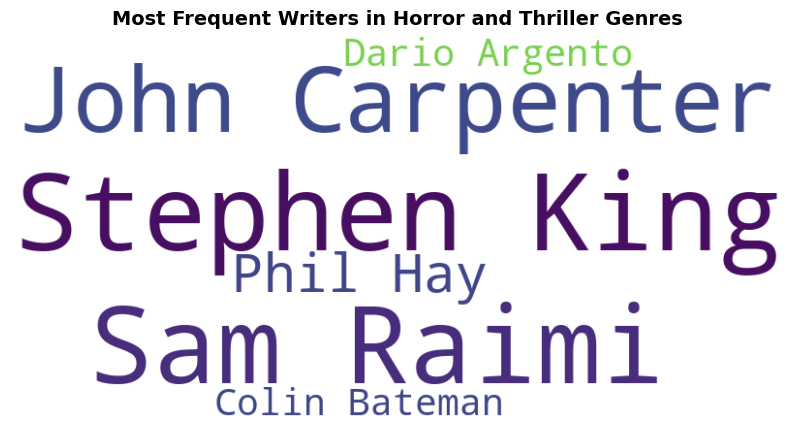

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Count the occurrences of each writer in the dataset
writer_counts = Writers = merged_tn_imdb[(merged_tn_imdb['category'] == 'writer') & 
                                           (merged_tn_imdb['genres'].str.contains('Horror|Thriller')) &
                                           (merged_tn_imdb['avg_ratings'] >= 6.5)]

writer_frequency = writer_counts['artist_name'].value_counts()

# Create a word cloud
plt.figure(figsize=(10, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(writer_frequency)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Writers in Horror and Thriller Genres', fontsize=14, fontweight='bold')
plt.show()

### Prominent Writers:

Sam Raimi stands out as the largest word in the cloud, indicating that he is the most frequently appearing writer in this dataset for the Horror and Thriller genres. His extensive body of work in these genres makes him a notable figure in both categories.

Colin Bateman and Dario Argento follows closely behind, suggesting his frequent contributions to the genres as well, particularly in the Thriller category, where his name is synonymous with iconic works.

Other Notable Writers:

Phil Hay, , John Carpenter, and Stephen King also appear prominently in the cloud, showcasing their significant roles in shaping the Horror and Thriller genres. These writers have consistently produced content that resonates with audiences, as reflected in their repeated presence in high-rated films.
Interpretation of Size and Frequency:

The size of the names in the word cloud is proportional to the number of films written by each author in these genres, meaning the larger the name, the more frequently they appear in this dataset. This gives a quick visual cue of the most influential and prolific writers in the space.